#1.

In [1]:
import pandas as pd

In [2]:
dados = pd.read_excel("/content/gaf_esp.xlsx")
dados.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


In [3]:
dados.tail()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
95,Esperança,9.75,6.2
96,Esperança,6.20,8.1
97,Esperança,9.20,4.7
98,Esperança,9.10,6.0
99,Esperança,8.29,7.0


In [4]:
dados.describe()

,Comprimento do Abdômen,Comprimento das Antenas
count,100.000000,100.000000
mean,4.936200,5.382400
std,3.343806,2.296001
min,0.500000,0.890000
25%,1.692500,3.775000
50%,4.500000,5.500000
75%,8.200000,7.000000
max,10.000000,9.700000


In [5]:
dados.shape

(100, 3)

In [6]:
dados.groupby("Espécie").describe()

Comprimento do Abdômen                                              \
                           count    mean       std  min    25%    50%    75%   
Espécie                                                                        
Esperança                   50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                   50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                Comprimento das Antenas                                       \
            max                   count    mean       std   min    25%   50%   
Espécie                                                                        
Esperança  10.0                    50.0  7.2156  1.334945  4.50  6.205  7.00   
Gafanhoto   3.6                    50.0  3.5492  1.417861  0.89  2.550  3.77   

                     
           75%  max  
Espécie              
Esperança  8.2  9.7  
Gafanhoto  4.3  7.0

<Axes: xlabel='Comprimento do Abdômen', ylabel='Comprimento das Antenas'>

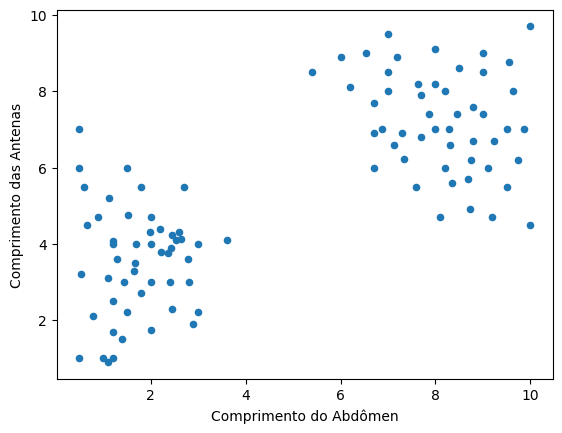

In [7]:
dados.plot.scatter(x="Comprimento do Abdômen", y="Comprimento das Antenas")

In [8]:
from sklearn import *
#ou para imporar especificamente uma parte da bibilioteca -->
from sklearn.model_selection import train_test_split

In [9]:
x = dados[["Comprimento do Abdômen", "Comprimento das Antenas"]]
y = dados["Espécie"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=42) #stratify é usado para dividir os dados proporcionalmente

In [11]:
list(y_train).count("Gafanhoto")

40

In [12]:
list(y_train).count("Esperança")

40

In [13]:
len(x_train)

80

In [14]:
len(x_test)

20

In [15]:
y_train

65    Esperança
2     Gafanhoto
10    Gafanhoto
16    Gafanhoto
18    Gafanhoto
        ...    
67    Esperança
86    Esperança
35    Gafanhoto
71    Esperança
75    Esperança
Name: Espécie, Length: 80, dtype: object

In [16]:
y_test

7     Gafanhoto
27    Gafanhoto
13    Gafanhoto
1     Gafanhoto
57    Esperança
64    Esperança
70    Esperança
25    Gafanhoto
68    Esperança
72    Esperança
92    Esperança
8     Gafanhoto
99    Esperança
88    Esperança
60    Esperança
43    Gafanhoto
19    Gafanhoto
78    Esperança
6     Gafanhoto
34    Gafanhoto
Name: Espécie, dtype: object

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
modelo_classificador = KNeighborsClassifier(n_neighbors=3)

In [19]:
modelo_classificador.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
modelo_classificador.predict([[8,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Esperança'], dtype=object)

In [21]:
y_predito = modelo_classificador.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_true=y_test, y_pred=y_predito)

1.0